In [1]:
%reload_ext autoreload

%autoreload 2

In [65]:
input_file = "../../test_data/system_tests/MaxQuant_Kuster200/peptides.txt"
maxquant_file = "../../test_data/system_tests/MaxQuant_Kuster200/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/MaxQuant_Kuster200/peptides.txt.maxquant_peptides_benchmarking.aq_reformat.tsv.protein_intensities.tsv"

samplemap_directlfq = "../../test_data/system_tests/MaxQuant_Kuster200/samplemap.directLFQ.tsv"

samplemap_maxquant = "../../test_data/system_tests/MaxQuant_Kuster200/samplemap.maxLFQ.tsv"

run_directlfq = False

In [66]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_peptides_benchmarking")


In [70]:
import numpy as np

class VariationOverview():
    def __init__(self, name, quantified_data, protein_intensity_columns):
        self._protein_intensity_df = quantified_data[protein_intensity_columns]

        self.name = name
        self.quantified_proteins = None
        self._define_quantified_proteins()
    
    def _define_quantified_proteins(self):
        self.quantified_proteins = [QuantifiedProtein(x) for x in self._protein_intensity_df.to_numpy()]


class QuantifiedProtein():
    def __init__(self, intensities):
        intensities = np.where(intensities==0, np.nan, intensities) 
        self.intensities = intensities[np.isfinite(intensities)]
        self.cv = self._calc_cv()
    
    def _calc_cv(self):
        return np.nanstd(self.intensities) / np.nanmean(self.intensities)




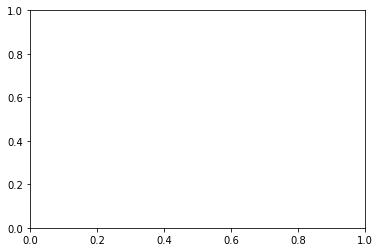

In [97]:
import matplotlib.pyplot as plt


class ProteinCVhistogram():
    def __init__(self, list_of_variation_overviews, ax: plt.Axes = plt.subplot() ):
        self._list_of_variation_overviews = list_of_variation_overviews
        self._ax = ax
        self._plot_histograms()

    def _plot_histograms(self):
        for variation_overview in self._list_of_variation_overviews:
            self._add_cv_histogram(variation_overview)
        
    def _add_cv_histogram(self, variation_overview):
        cvs = [x.cv for x in variation_overview.quantified_proteins]
        self._ax.hist(cvs, label=variation_overview.name, cumulative=True, histtype='step', density=False, bins=3000, linewidth = 1.5)
        

/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_26773/1717476402.py:22: RuntimeWarning: Mean of empty slice
  return np.nanstd(self.intensities) / np.nanmean(self.intensities)
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_26773/1163649059.py:9: DtypeWarning: Columns (5,6,1624,1625,1626,1634,1635) have mixed types. Specify dtype option on import or set low_memory=False.
  results_df_maxquant = pd.read_csv(maxquant_file, sep = "\t")
/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/wb/j08kzzbd2hd8838tn3ll0jfm0000gn/T/ipykernel_26773/1717476402.py:22: RuntimeWarning: Me

(0.0, 0.75)

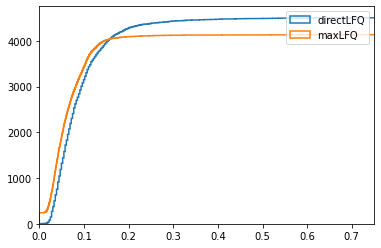

In [98]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils
import pandas as pd

results_df_directlfq = pd.read_csv(directlfq_file, sep="\t")
relevant_columns_directlfq = [x for x in results_df_directlfq.columns if "Cycle" in x]
var_overview_directlfq = VariationOverview("directLFQ", quantified_data=results_df_directlfq, protein_intensity_columns=relevant_columns_directlfq)

results_df_maxquant = pd.read_csv(maxquant_file, sep = "\t")
relevant_columns_maxquant = [x for x in results_df_maxquant.columns if "LFQ intensity " in x]
var_overview_maxquant = VariationOverview("maxLFQ", quantified_data=results_df_maxquant, protein_intensity_columns=relevant_columns_maxquant)

ax = plt.subplot()
ProteinCVhistogram([var_overview_directlfq, var_overview_maxquant], ax=ax)
ax.legend()
ax.set_xlim(0, 0.75)